# Fitting parameters with SciPy

In [5]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
%matplotlib inline 

In this example, a logistic function will be fitted to synthetic data using Scipy's 'optimize' function.

The logistic function is defined as
$$ f(x) = \frac{a}{1+\exp\big(-(b x - x_0)\big)} ,$$

where $a$ is the maximum value of the $f(x)$, $b$ determines the steepness of the curve, and $x_0$ is the midpoint of the curve, which is also the point of half-maximum and the inflection point.

First, we'll code the logistic function in python:

In [12]:
def logistic(params,x):
    """ 
    Logistic function

    Parameters
    ----------
    params : list or numpy array
      the three parameters of the logistic function
    x : numpy array
      the explanatory variable
   
    Return
    ------
    numpy array
      the output of the logistic function

    """
    return params[0]/(1+np.exp(-x*params[1] - params[2])) 

When $a=b=x_{0}=1$, the logistic function looks like this:

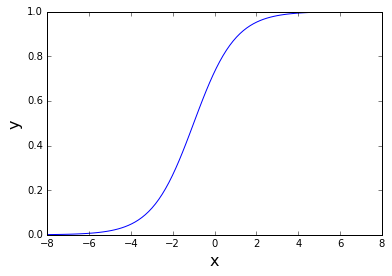

In [14]:
x = np.linspace(-8,8,100)          # creating a set of x values
y = logistic([1,1,1],x)            # parsing the x values through the logistic function

# Plotting
plt.plot(x, y)
plt.xlabel('x', size=16)
plt.ylabel('y', size=16)
plt.show()   

Note how the y lies between 0 and 1. Owing to the way we've coded it, the logistic function cannot be negative.

Now, let's create some synthetic data to fit to. We'll set $a=3$, $b=2$, and $x_0=0$ and add some noise to the data. The noise will be sampled from a Gaussian distribution with a mean of 0 and standard deviation of 0.05.

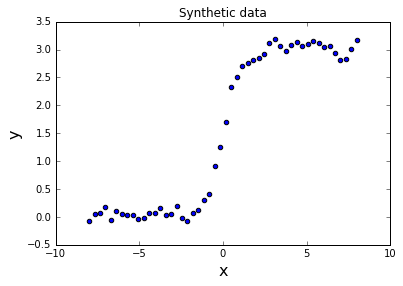

In [26]:
x = np.linspace(-8,8,50)          
y = logistic([3,2,0],x)  + np.random.normal(0,0.1,size=50)

# Having a look at what that looks like:
plt.scatter(x, y)
plt.xlabel('x', size=16)
plt.ylabel('y', size=16)
plt.title('Synthetic data')
plt.show()   

To fit, we'll create a function that returns the residuals of our trial fit to the noisy data. When fitting the parameters, we'll be minimising the residuals, which in this case is the sum of squares.

In [27]:
def residuals(params):
    predicted = logistic(params,x)
    return np.sum((y-predicted)**2)

Starting from an initial guess of the parameters, will minimise the residuals with SciPy's `optimize` function.

In [34]:
initial_guess = [1,1,1]
fit = optimize.minimize(residuals,initial_guess,method='BFGS')
print "The predicted parameters are", fit.x

The predicted parameters are [ 3.02673785  1.95091347 -0.00912233]


These look very close to the true parameters of the model:  $a=3$, $b=2$, and $x_0=0$. 

We can illustrate this nicely with yet another plot.

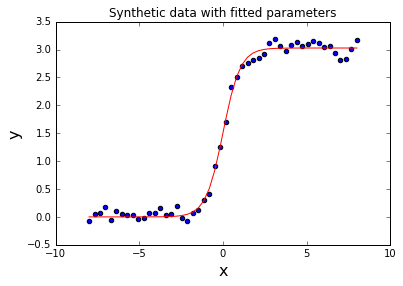

In [39]:
predicted =  logistic(fit.x,x)
plt.scatter(x, y)
plt.plot(x,predicted,color="red")
plt.xlabel('x', size=16)
plt.ylabel('y', size=16)
plt.title('Synthetic data with fitted parameters')
plt.show()  